In [123]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
city_ride_df = pd.merge(ride_data, city_data, how="left",on=["city"])
# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [124]:
# x_axis is total number of rides per city, use count of ride_id 
# drop date column
city_ride_df = city_ride_df.groupby(["city"]).agg({"driver_count":"mean","fare":"mean","ride_id":"count"})
city_ride_df.head()

,driver_count,fare,ride_id
city,,,
Amandaburgh,12,24.641667,18
Barajasview,26,25.332273,22
Barronchester,11,36.422500,16
Bethanyland,22,32.956111,18
Bradshawfurt,7,40.064000,10


In [125]:
# city_group = city_ride_df.groupby("city").agg({"fare":"mean", "ride_id":"count",
#                                                     "driver_count" : "mean"})

# city_group.sort_values("ride_id")

new_city_ride_df = pd.merge(city_ride_df, city_data, how="left", on=["city", "city"])
rides_df = new_city_ride_df[["city", "fare", "ride_id","driver_count_x", "driver_count_y", "type"]]
rides_df = rides_df.drop(columns=["driver_count_y"])
rides_df.head()

,city,fare,ride_id,driver_count_x,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


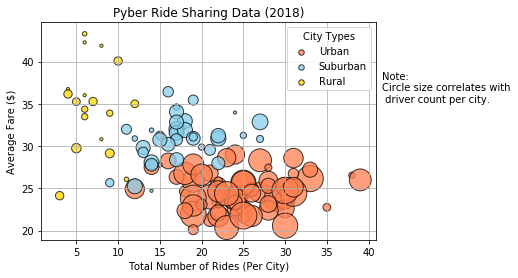

<Figure size 432x288 with 0 Axes>

In [126]:
# Obtain the x and y coordinates for each of the three city types
# ride_id is the count of rides here
# create 3 different x_axis for the city type
# y_axis is the fare amount
# size of plots are based on driver count, multiply by 10 to increase sizes
y_axis = rides_df["fare"]
x_axis = rides_df["ride_id"]
circle_size = 10 *rides_df["driver_count_x"]

# # Build the scatter plots for each city types
fig, ax = plt.subplots()
rides_urb = rides_df[rides_df["type"] == "Urban"]
rides_sub = rides_df[rides_df["type"] == "Suburban"]
rides_rur = rides_df[rides_df["type"] == "Rural"]

plt.scatter(rides_urb["ride_id"],rides_urb["fare"], s = 10* rides_urb["driver_count_x"],c="Coral", edgecolors="black", alpha =.75, linewidths = 1, label = "Urban")
plt.scatter(rides_sub["ride_id"],rides_sub["fare"],s = 10* rides_sub["driver_count_x"],c="SkyBlue",edgecolors="black", alpha =.75, linewidths = 1, label = "Suburban")
plt.scatter(rides_rur["ride_id"],rides_rur["fare"],s = 10* rides_rur["driver_count_x"],c="Gold", edgecolors="black", alpha =.75, linewidths = 1, label = "Rural")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")
plt.grid(True)

# Create a legend
plt.legend(loc='upper right', title =  "City Types" )
lgnd = plt.legend(loc="upper right",title = "City Types", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(1.02,.7, 'Note: \nCircle size correlates with\n driver count per city.', ha='left', va='center', transform=ax.transAxes)

# Save Figure
plt.show()

# Save Figure
plt.savefig("PyberBubblePlot_AJ.png")

## Total Fares by City Type

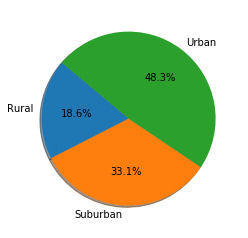

In [127]:
# Calculate Type Percents
# % of total fares by city type
city_ride_pie = rides_df
city_ride_pie = city_ride_pie.groupby(["type"]).agg({"fare":"sum","ride_id":"sum","driver_count_x":"sum"})
# 3 city types, add all fares
city_ride_pie["total fare"] = city_ride_pie["fare"][0] + city_ride_pie["fare"][1] + city_ride_pie["fare"][2] 
city_ride_pie["% of total fares"] = city_ride_pie["fare"]/city_ride_pie["total fare"] * 100
city_ride_pie.reset_index()
label = ["Rural","Suburban","Urban"]

# Build Pie Chart
plt.pie(city_ride_pie["% of total fares"],labels= label,autopct="%1.1f%%",shadow=True, startangle=140)
# Save Figure
plt.savefig("PyberPiePlot_faresbytype_AJ.png")

## Total Rides by City Type

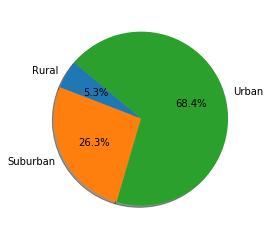

In [128]:
# Calculate Ride Percents

# 3 city types, add all rides
city_ride_pie["total rides"] = city_ride_pie["ride_id"][0] + city_ride_pie["ride_id"][1] + city_ride_pie["ride_id"][2] 
city_ride_pie["% of total rides"] = city_ride_pie["ride_id"]/city_ride_pie["total rides"] * 100
city_ride_pie.reset_index()
label = ["Rural","Suburban","Urban"]

# Build Pie Chart
plt.pie(city_ride_pie["% of total rides"],labels= label,autopct="%1.1f%%",shadow=True, startangle=140)

# Save Figure
plt.savefig("PyberPiePlot_ridesbytype_AJ.png")

## Total Drivers by City Type

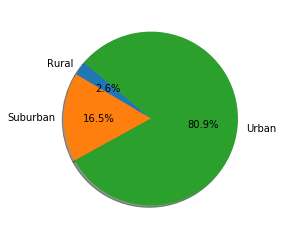

In [129]:
# 3 city types, add all rides
city_ride_pie["total drivers"] = city_ride_pie["driver_count_x"][0] + city_ride_pie["driver_count_x"][1] + city_ride_pie["driver_count_x"][2] 
city_ride_pie["% of total drivers"] = city_ride_pie["driver_count_x"]/city_ride_pie["total drivers"] * 100
city_ride_pie.reset_index()
label = ["Rural","Suburban","Urban"]

# Build Pie Chart
plt.pie(city_ride_pie["% of total drivers"],labels= label,autopct="%1.1f%%",shadow=True, startangle=140)

# Save Figure
plt.savefig("PyberPiePlot_driversbytype_AJ.png")